#### Audio Classification Data Preprocessing

In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='D:/UrbanSound8K/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


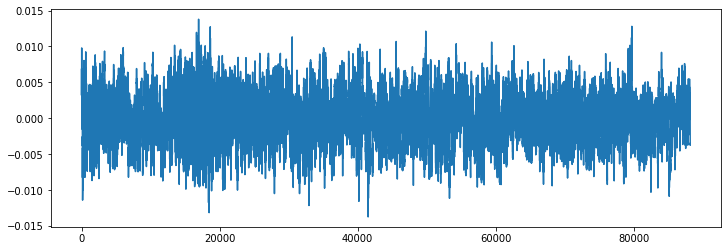

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

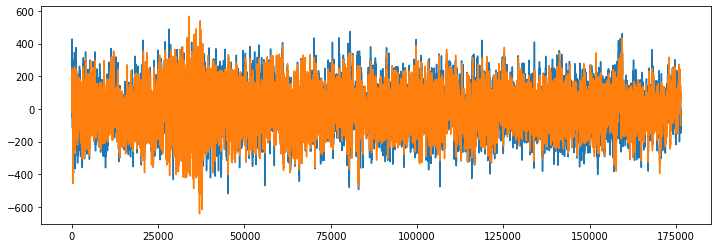

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085263e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299151e+02],
       [-1.8326149e+01, -2.4682455e+01, -3.0259777e+01, ...,
        -8.2357597e+00, -9.0665350e+00, -4.5019560e+00],
       ...,
       [-2.8760438e+00, -3.2479761e+00, -4.8965530e+00, ...,
        -5.2023613e-01,  3.5672503e+00,  7.4937558e+00],
       [-4.2968374e-01, -5.8838749e-01, -8.1724131e-01, ...,
         1.8340763e-01,  7.6732612e-01,  2.7120004e+00],
       [-1.1780634e+00,  6.9809413e-01,  6.3521609e+00, ...,
        -2.6221936e+00, -4.7912698e+00, -3.1826305e+00]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='D:/UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [11]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [11:09,  5.75it/s]C:\Users\kesha\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [25:11, 14.67it/s]C:\Users\kesha\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\kesha\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [26:13,  5.55it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [13]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(8732, 40)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697179e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
X_train.shape

(6985, 40)

In [22]:
X_test.shape

(1747, 40)

In [23]:
y_train.shape

(6985, 10)

In [24]:
y_test.shape

(1747, 10)

### Model Creation

In [25]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
### No of classes
num_labels=y.shape[1]

In [28]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


215/219 [============================>.] - ETA: 0s - loss: 12.0833 - accuracy: 0.1218
Epoch 1: val_loss improved from inf to 2.27509, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 8s 15ms/step - loss: 11.9477 - accuracy: 0.1221 - val_loss: 2.2751 - val_accuracy: 0.1236
Epoch 2/100
  6/219 [..............................] - ETA: 2s - loss: 3.1863 - accuracy: 0.1667

C:\Users\kesha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/219 [============================>.] - ETA: 0s - loss: 2.6729 - accuracy: 0.1342
Epoch 2: val_loss did not improve from 2.27509
219/219 [==============================] - 2s 10ms/step - loss: 2.6727 - accuracy: 0.1343 - val_loss: 2.2761 - val_accuracy: 0.1219
Epoch 3/100
219/219 [==============================] - ETA: 0s - loss: 2.3762 - accuracy: 0.1333
Epoch 3: val_loss improved from 2.27509 to 2.26472, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 11ms/step - loss: 2.3762 - accuracy: 0.1333 - val_loss: 2.2647 - val_accuracy: 0.1242
Epoch 4/100
218/219 [============================>.] - ETA: 0s - loss: 2.2818 - accuracy: 0.1340
Epoch 4: val_loss improved from 2.26472 to 2.21517, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 12ms/step - loss: 2.2818 - accuracy: 0.1340 - val_loss: 2.2152 - val_accuracy: 0.1345
Epoch 5/100
213/219 [============================>.] - ETA: 0s -

OSError: [Errno 0] Unable to synchronously create file (unable to lock file, errno = 0, error message = 'No error', Win32 GetLastError() = 33)

In [33]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.6479679346084595


In [34]:
#prediction_feature.shape

In [35]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.339348  ,
        -14.88148   ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339073  ,    7.6736345 ,  -29.164494  ,  -18.950253  ,
         -2.9579995 ,   -8.16233   ,  -15.153101  ,   -6.6048055 ,
         -7.568598  ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.6302314 ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009955  ,    0.53346086,  -23.84339   ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.5832012 ,
         -1.2624055 ,   17.700018  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [36]:
'''model.predict_classes(X_test)
filename='D:/UrbanSound8K/dog_bark.wav'
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)

# Use predict method to get raw predictions
raw_predictions = model.predict(prediction_feature)

# Process the raw predictions to get the predicted classes
predicted_classes = raw_predictions.argmax(axis=1)

# Now `predicted_classes` contains the predicted class labels'''
print(f"array{(X_test)}")

'''# Process the raw predictions to get the predicted classes
predicted_classes = raw_predictions.argmax(axis=1)
model.predict_classes(prediction_feature)'''

array[[-2.67613708e+02  1.03736465e+02  1.76864719e+01 ... -1.67063689e+00
  -5.25388062e-01 -3.24234247e+00]
 [-4.66179565e+02  1.09502459e+00 -3.40138893e+01 ...  1.77000179e+01
   1.38474627e+01 -5.18628263e+00]
 [-9.33917236e+01  4.38009338e+01 -4.23669548e+01 ...  4.27829695e+00
  -6.79035842e-01 -1.84728265e+00]
 ...
 [-1.28723007e+02  1.39382263e+02 -3.37595596e+01 ... -9.42206955e+00
   4.83702660e+00  1.19141665e+01]
 [-2.05466263e+02  9.81175690e+01 -2.96137104e+01 ... -3.55392188e-01
   1.11790216e+00  5.29678583e-01]
 [-2.87615234e+02  1.50856705e+02  6.29480028e+00 ... -2.78350443e-01
  -2.11643672e+00 -1.58730888e+00]]


'# Process the raw predictions to get the predicted classes\npredicted_classes = raw_predictions.argmax(axis=1)\nmodel.predict_classes(prediction_feature)'

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [37]:
filename="D:/UrbanSound8K/dog_bark.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Assuming model is your trained neural network model and mfccs_scaled_features is your input data

# Use model.predict to get raw predictions
raw_predictions = model.predict(mfccs_scaled_features)

# Process the raw predictions to get the predicted classes
predicted_labels = raw_predictions.argmax(axis=1)

# Now you have the predicted labels. If you need the corresponding class names, you can use labelencoder.inverse_transform
prediction_classes = labelencoder.inverse_transform(predicted_labels)

print(prediction_classes)

'''predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class'''

[-3.9742188e+02  1.4218434e+02  1.0239104e+01 -9.6230555e+00
 -8.1905851e+00  7.6672630e+00 -1.0299530e+01 -7.1226473e+00
 -3.5969069e+00 -5.6251779e+00 -2.4014688e+00 -3.5109861e+00
  5.2140427e+00  9.1520948e+00  9.7396631e+00  1.2672479e+01
  2.4935958e+00 -1.9596174e-01  2.0568910e+00  1.2565471e-01
  2.3887670e-01 -2.2244754e+00 -4.1830082e+00 -8.7841487e-01
  5.5512720e-01  1.4530714e+00  1.5828409e+00  2.5280828e+00
  4.4751973e+00  1.8469353e+00  8.8243961e-02 -2.5079804e-02
  1.9693791e+00  1.1326447e+00  1.8206306e-01 -9.0641969e-01
 -2.5448072e+00 -1.7134562e+00 -1.3600037e+00  3.9560720e-01]
[[-3.9742188e+02  1.4218434e+02  1.0239104e+01 -9.6230555e+00
  -8.1905851e+00  7.6672630e+00 -1.0299530e+01 -7.1226473e+00
  -3.5969069e+00 -5.6251779e+00 -2.4014688e+00 -3.5109861e+00
   5.2140427e+00  9.1520948e+00  9.7396631e+00  1.2672479e+01
   2.4935958e+00 -1.9596174e-01  2.0568910e+00  1.2565471e-01
   2.3887670e-01 -2.2244754e+00 -4.1830082e+00 -8.7841487e-01
   5.5512720e-01 

'predicted_label=model.predict_classes(mfccs_scaled_features)\nprint(predicted_label)\nprediction_class = labelencoder.inverse_transform(predicted_label) \nprediction_class'